# <center> Tarea 5
    
# <center> Manuel Francisco Martinez Motta
# <center> Manuela Isabella Nobile Russi

In [1]:
# Zona de librerías:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import random as rnd
import math as math
import scipy as sci

### Punto 1

In [2]:
dx, dy = 0.1, 0.1
N_1 = 50
x_1 = np.linspace(0,20,N_1)
y_1 = x_1.copy()

In [3]:
h1 = lambda x: 10
h2 = lambda x: 0
h3 = lambda y: 0
h4 = lambda y: 0

In [4]:
def InitT():
    T = np.zeros((N_1,N_1))
    T[-1,:] = h3(x_1)
    T[:,-1] = h4(x_1)
    T[0,:] = h3(y_1)
    T[:,0] = h1(y_1)
  
    return T

In [5]:
T = InitT()

In [6]:
def f(x,y):
    return np.exp(-x*y)

In [7]:
def GausSeidel(x,y,T,omega=0.7,Nit = int(1e5), tolerancia = 1e-3,):
    
    itmax = 0
    
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                
                Tij = (dy**2 * (T[i+1,j] + T[i-1,j]) + dx**2 * (T[i,j+1]+T[i,j-1]) - dx**2 * dy**2 * f(x[i],y[j]))/(2*(dx**2 + dy**2))
                
                # Matriz resta
                r = omega*(Tij - T[i,j])
                
                # Actualizo la matrix
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        #print(np.round(T,2))
                
        
        if np.abs(dmax) < tolerancia:
            
            print(it)
            itmax = it
            break
            
    return T,itmax

In [8]:
Tf1,_ = GausSeidel(x_1,y_1,T)

  1%|▊                                                                            | 985/100000 [00:12<21:03, 78.38it/s]

985


<IPython.core.display.Javascript object>


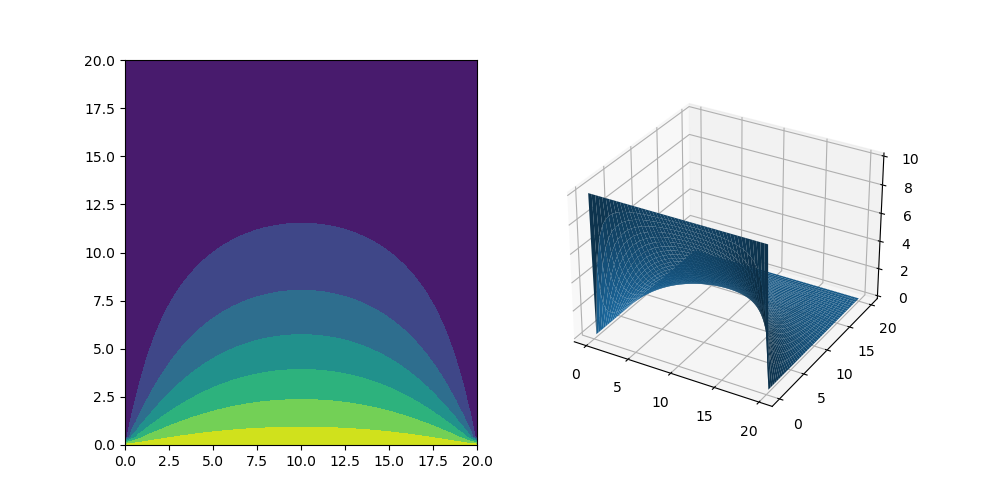

In [9]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_subplot(121)
ax_2 = fig.add_subplot(122, projection='3d')

X,Y = np.meshgrid(x_1,y_1)
c = ax_1.contourf(X,Y,Tf1.T)
ax_2.plot_surface(X,Y,Tf1.T)

### Punto 2

In [10]:
T_max = 1
alpha_2,beta_2 =1.,1.
dx_2,dy_2,dt_2 = 0.2,0.2,0.1

In [11]:
def h(t,x,y):
    return np.exp(-2*np.pi**2*t)*np.sin(np.pi*(x+y))

In [12]:
x_2 = np.arange(0,1,dx_2)
y_2 = np.arange(0,1,dy_2)
t_2 = np.arange(0,T_max,dt_2)

In [13]:
def init():
    
    ax.set_xlim3d(0,1)
    ax.set_ylim3d(0,1)
    ax.set_zlim3d()

def InitT():
    
    T = np.zeros((len(t_2),len(x_2),len(y_2)))    
    for n in range(len(t_2)):
        T[n,:,0]  = h(t_2[n],0,y_2)
        T[n,0,:]  = h(t_2[n],x_2,0)
        T[n,:,-1] = h(t_2[n],x_2[-1],y_2)
        T[n,-1,:] = h(t_2[n],x_2,y_2[-1])
    
    return T

In [14]:
lambda_2 = alpha_2*dt_2/dx_2**2
mu_2     = beta_2*dt_2/dy_2**2

def GetSolution(omega,T):
    for l in range(1,len(t_2)):
        for i in range(1,len(x_2)-1):
            for j in range(1,len(y_2)-1):
                Tmp = (1-2*lambda_2-2*mu_2)*T[l-1,i,j] + \
                lambda_2*(T[l-1,i+1,j] + T[l-1,i-1,j]) + \
                mu_2*(T[l-1,i,j+1] + T[l-1,i,j-1])
                
                r = omega*(Tmp - T[l,i,j])
                
                T[l,i,j] += r

In [15]:
T = InitT()
GetSolution((1/2.5)*0.1,T)

<IPython.core.display.Javascript object>


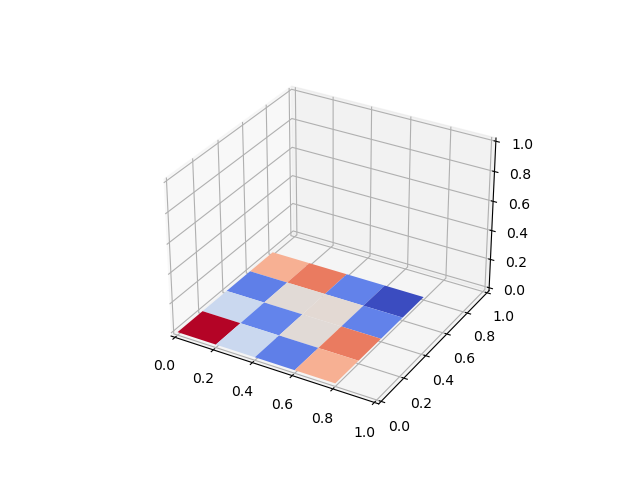

In [16]:
X,Y = np.meshgrid(x_2,y_2)
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,T[i,:,:],cmap='coolwarm')
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t_2),init_func=init, repeat = False)

### Punto 3

Tenemos que la ecuación de onda es

$\frac{\partial^{2}u}{\partial t^{2}} = \alpha^{2} \cdot \nabla^{2}u $

Que en coordenadas cilindricas dado el Laplaciano tenemos que 

$\frac{\partial^{2}u}{\partial t^{2}} = \alpha^{2} \left[\frac{\partial^{2} u}{\partial \rho^{2}} + \frac{1}{\rho^{2}}\frac{\partial^{2} u}{\partial \phi^{2}} + \frac{1}{\rho}\frac{\partial u}{\partial \rho}\right]$

Con esta ecuación, podemos discretizarla para poder llegar al resultado que tenemos, en donde entonces

$\frac{u^{l + 1}_{i, j} - 2u^{l}_{i, j} + u^{l - 1}_{i, j}}{(\Delta{t})^{2}} = \alpha^{2} \cdot \left[\frac{u^{l}_{i + 1, j} - 2u^{l}_{i, j} + u^{l}_{i - 1, j}}{(\Delta{\rho})^{2}} + \frac{1}{\rho[i]^{2}}\frac{u^{l}_{i, j + 1} - 2u^{l}_{i, j} + u^{l}_{i, j - 1}}{(\Delta{\phi})^{2}} + \frac{1}{\rho[i]}\frac{u^{l}_{i, j} - u^{l}_{i - 1, j}}{\Delta\rho}\right]$

Donde tomamos i como indice para el radio, j para los ángulos y $l$  para el paso temporal dada la ecuación que queremos demostrar. Entonces

$u^{l + 1}_{i, j} = \Delta{t}^{2}\alpha^{2} \cdot \left[\frac{u^{l}_{i + 1, j} - 2u^{l}_{i, j} + u^{l}_{i - 1, j}}{\Delta{\rho}^{2}} + \frac{1}{\rho[i]^{2}}\frac{u^{l}_{i, j + 1} - 2u^{l}_{i, j} + u^{l}_{i, j - 1}}{\Delta{\phi}^{2}} + \frac{1}{\rho[i]}\frac{u^{l}_{i, j} - u^{l}_{i - 1, j}}{\Delta\rho}\right] + 2u^{l}_{i, j} - u^{l - 1}_{i, j}$

$u^{l + 1}_{i, j} = \left[\frac{\alpha\Delta{t}}{\Delta{\rho}}\right]^{2} \cdot \left[u^{l}_{i + 1, j} - 2u^{l}_{i, j} + u^{l}_{i - 1, j} + \left(\frac{\Delta\rho}{\rho[i]\Delta{\phi}}\right)^{2} \left(u^{l}_{i, j + 1} - 2u^{l}_{i, j} + u^{l}_{i, j - 1}\right) + \frac{\Delta\rho}{\rho[i]} \left(u^{l}_{i, j} - u^{l}_{i - 1, j}\right)\right] + 2u^{l}_{i, j} - u^{l - 1}_{i, j}$

Tomando $\lambda := \frac{\Delta\rho}{\Delta\phi} \quad \text{ y } \quad \nu := \frac{\alpha\Delta{t}}{\Delta\rho}$ tenemos que

$u_{i, j}^{l + 1} = \nu^{2} \cdot \left[u_{i + 1, j}^{l} - 2u_{i, j}^{l} + u_{i - 1, j}^{l} + \left(\frac{\lambda}{\rho[i]}\right)^{2} \cdot \left(u_{i, j + 1}^{l} - 2u_{i, j}^{l} + u_{i, j - 1}^{l}\right) + \frac{\Delta\rho}{\rho[i]} \cdot \left(u_{i, j}^{l} - u_{i - 1, j}^{l}\right)\right] + 2u_{i, j}^{l} - u_{i, j}^{l - 1}$

### Punto 5

In [17]:
dx_5, dy_5, dt_5 = 0.04, 0.04, 0.001
Nx_5, Ny_5, Nt_5 = 50,50,10000
v = 2.

In [18]:
x_5 = np.linspace(0.,2.,Nx_5)
y_5 = np.linspace(0.,2.,Ny_5)
t_5 = np.linspace(0.,10.,Nt_5)

In [19]:
alpha = v
beta = v

lambda_5 = (alpha*dt_5)/dx_5
mu_5 = (beta*dt_5)/dy_5

In [20]:
def initT():
    u = np.zeros((Nt_5,Nx_5,Ny_5))
    
    for i in range(Nx_5):
        for j in range(Ny_5):
            u[:,i,j] = np.sin(np.pi*x_5[i])*np.sin(np.pi*y_5[j])
    return u

In [21]:
Wave = initT()

In [22]:
def Evolve(u):
    for l in tqdm(range(1, len(t_5))):
        if l == 1:
            u[l,:,:] = u[l - 1,:,:]
        else:
            for i in range(1, len(x_5) - 1):
                for j in range(1, len(y_5) - 1):
                    u[l, i, j] = 2*(1 - lambda_5**2 - mu_5**2)*u[l - 1, i, j] \
                                 + (lambda_5**2)*(u[l - 1, i + 1, j] + u[l - 1, i - 1, j]) \
                                 + (mu_5**2)*(u[l - 1, i, j + 1] + u[l - 1, i, j - 1]) - u[l - 2, i, j] 
    return u

In [23]:
Wave_ = Evolve(Wave) 

100%|█████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:59<00:00, 168.97it/s]


<IPython.core.display.Javascript object>


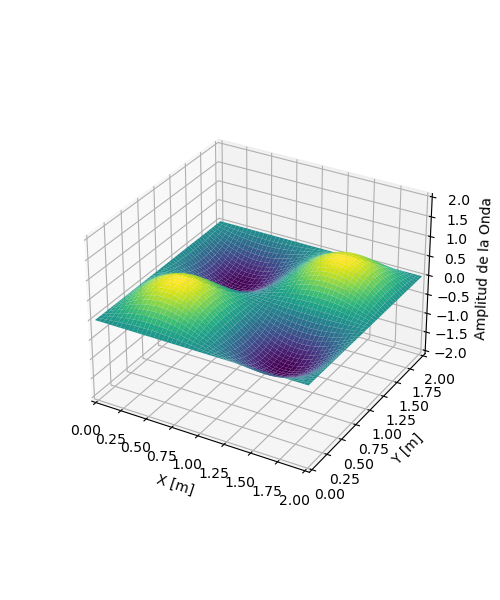

In [24]:
fig_5 = plt.figure(figsize=(5,6))
ax_1 = fig_5.add_subplot(111, projection='3d')

X_5,Y_5 = np.meshgrid(x_5,y_5)

def init_():
    ax_1.set_xlim3d(0,2)
    ax_1.set_ylim3d(0,2)
    ax_1.set_zlim3d(-2,2)
    ax_1.set_zlabel("Amplitud de la Onda")
    ax_1.set_ylabel("Y [m]")
    ax_1.set_xlabel("X [m]")

scale = 25
    
def Update_(i):
    ax_1.clear()
    init_()
    ax_1.plot_surface(X_5,Y_5,Wave_[::scale][i,:,:],cmap='viridis')
    
Animation_ = anim.FuncAnimation(fig_5,Update_,frames=len(t_5[::scale]),init_func=init_, repeat = False)

In [ ]:
Animation_.save('Simulación.gif', writer='Pillow')